In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Do not read the first column
test_data = pd.read_csv('challenge_test.csv', index_col=0)
train_data = pd.read_csv('challenge_train.csv', index_col=0)

In [157]:
from sklearn.preprocessing import FunctionTransformer


# Assuming 'Target' is the target variable and other columns are features
X = train_data.drop('Target', axis=1)
y = train_data['Target']

X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

# Define the transformation function to scale data from -pi to pi
def scale_data(data):
    # Scale the data from -pi to pi
    scaled_data = data + np.abs(np.min(data)) 
    scaled_data = scaled_data / np.max(scaled_data) * 2 * np.pi - np.pi
    return scaled_data

# Initialize a FunctionTransformer using the defined function
scaler = FunctionTransformer(scale_data)

# Transform the data using the defined scaler
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Concat the scaled data and the target variable
train_data = pd.concat([X_train_scaled, y], axis=1)
test_data = pd.concat([X_test_scaled, y_test], axis=1)

In [158]:
train_data.head()

,F1,F2,F3,F4,Target
0,-0.452073,1.523369,-0.391704,1.376235,1
1,0.117763,1.274981,-1.380749,0.250516,1
2,0.026165,1.208043,-0.779190,-0.868217,1
3,-0.601122,1.490634,-0.985343,-1.520516,1
4,-1.546316,0.993530,-1.281921,-0.184557,1


In [159]:
train_data.describe()

,F1,F2,F3,F4,Target
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.204552,-0.166415,-0.172961,-0.202390,0.506250
std,0.923450,1.039118,0.948741,0.891643,0.500274
min,-3.053754,-1.346620,-3.141593,-3.126785,0.000000
25%,-0.840493,-1.100194,-0.810018,-0.784258,0.000000
50%,-0.203626,-0.651744,-0.186925,-0.194405,1.000000
75%,0.424079,0.737250,0.455745,0.410450,1.000000
max,2.466747,3.141593,3.094463,2.807154,1.000000


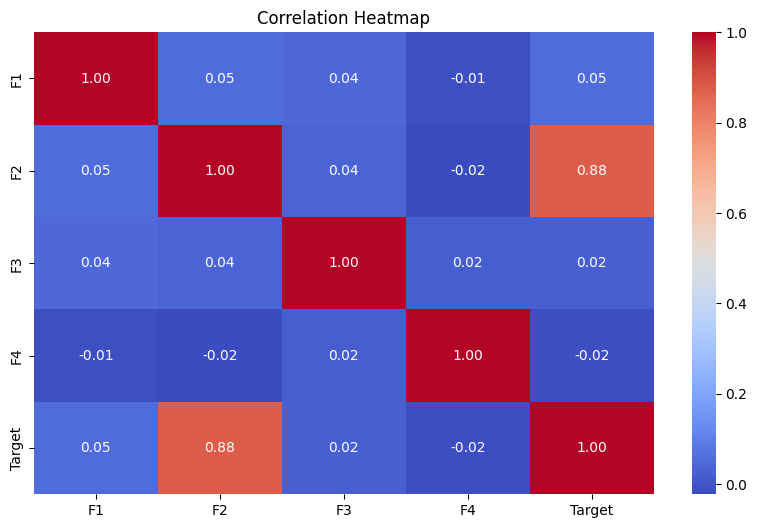

In [160]:
# Visualizing correlations between numerical features using a heatmap
plt.figure(figsize=(10, 6))
correlation = train_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

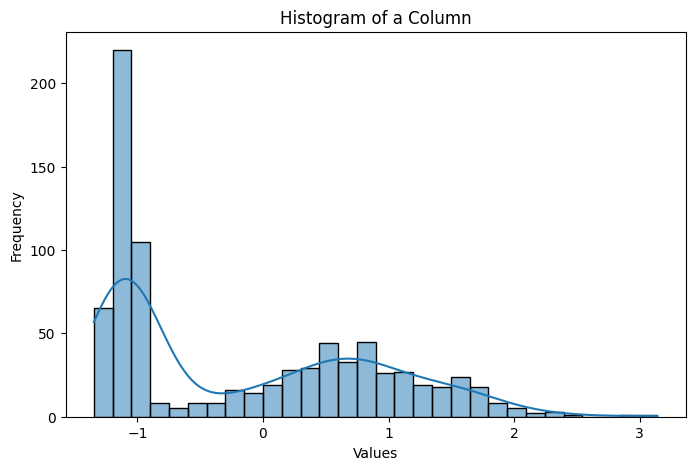

In [161]:
# Histogram for a specific column
plt.figure(figsize=(8, 5))
sns.histplot(train_data['F2'], bins=30, kde=True)  # Replace 'column_name' with the desired column
plt.title('Histogram of a Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

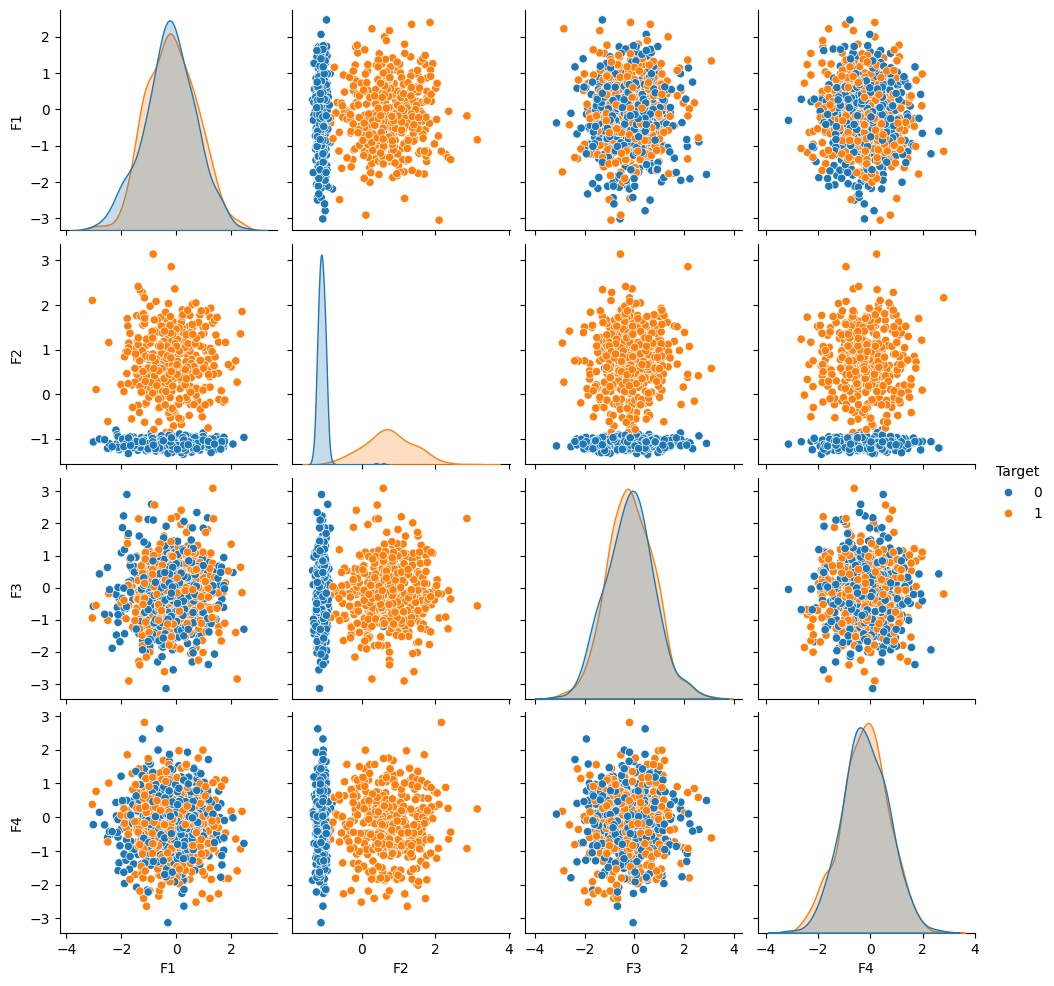

In [162]:
# Pairplot for visualizing relationships between different features
sns.pairplot(train_data, hue='Target')
plt.show()


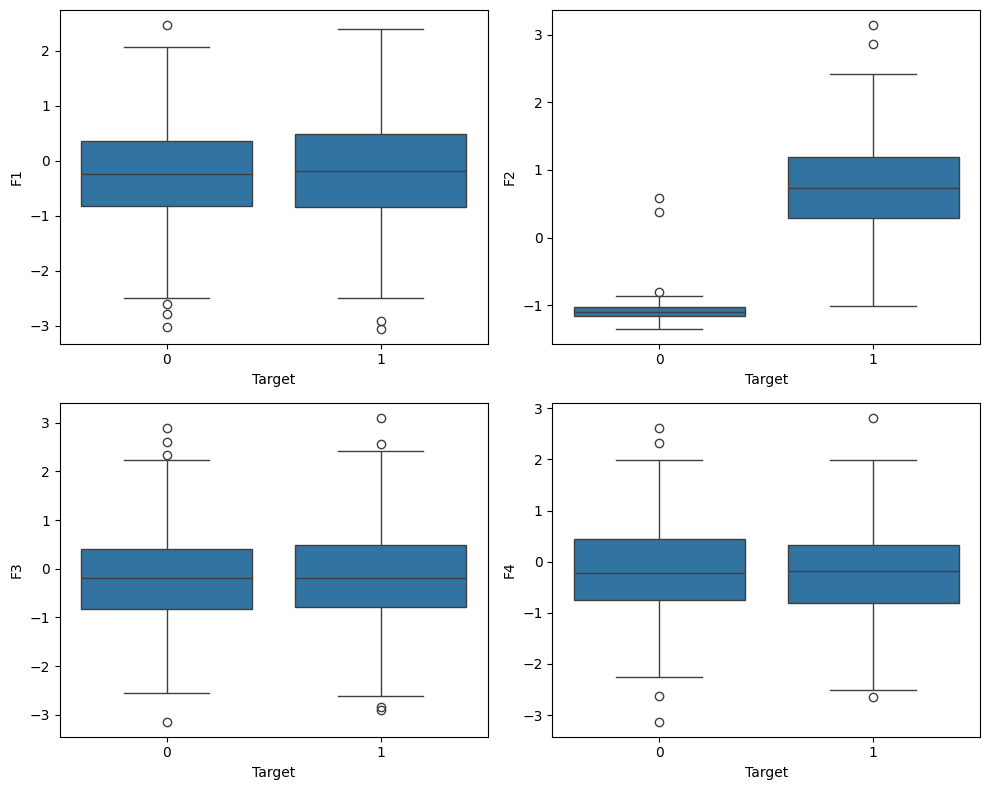

In [163]:
# Boxplot for each feature against the target variable
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, feature in enumerate(train_data.drop('Target', axis=1).columns):
    sns.boxplot(x='Target', y=feature, data=train_data, ax=axes[i // 2, i % 2])
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='F2', ylabel='Target'>

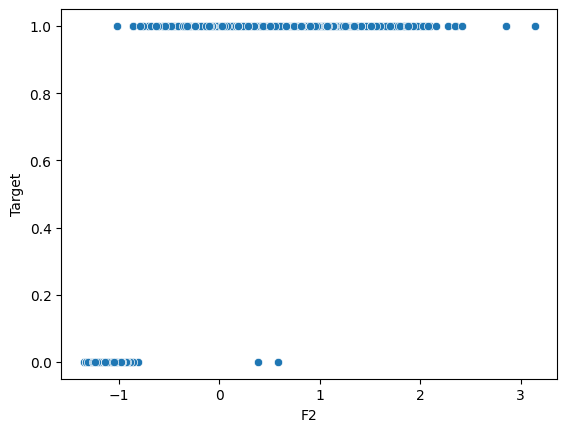

In [164]:
sns.scatterplot(x='F2', y='Target', data=train_data)

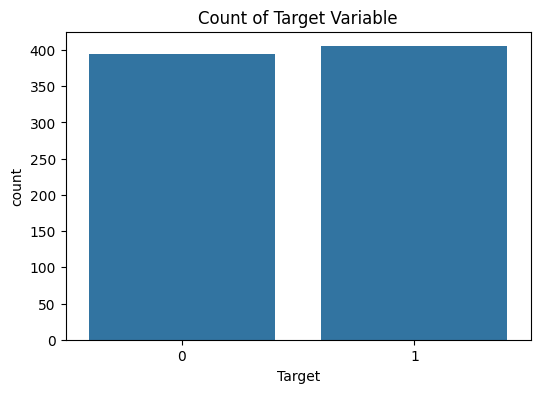

In [165]:
# Countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=train_data)
plt.title('Count of Target Variable')
plt.show()

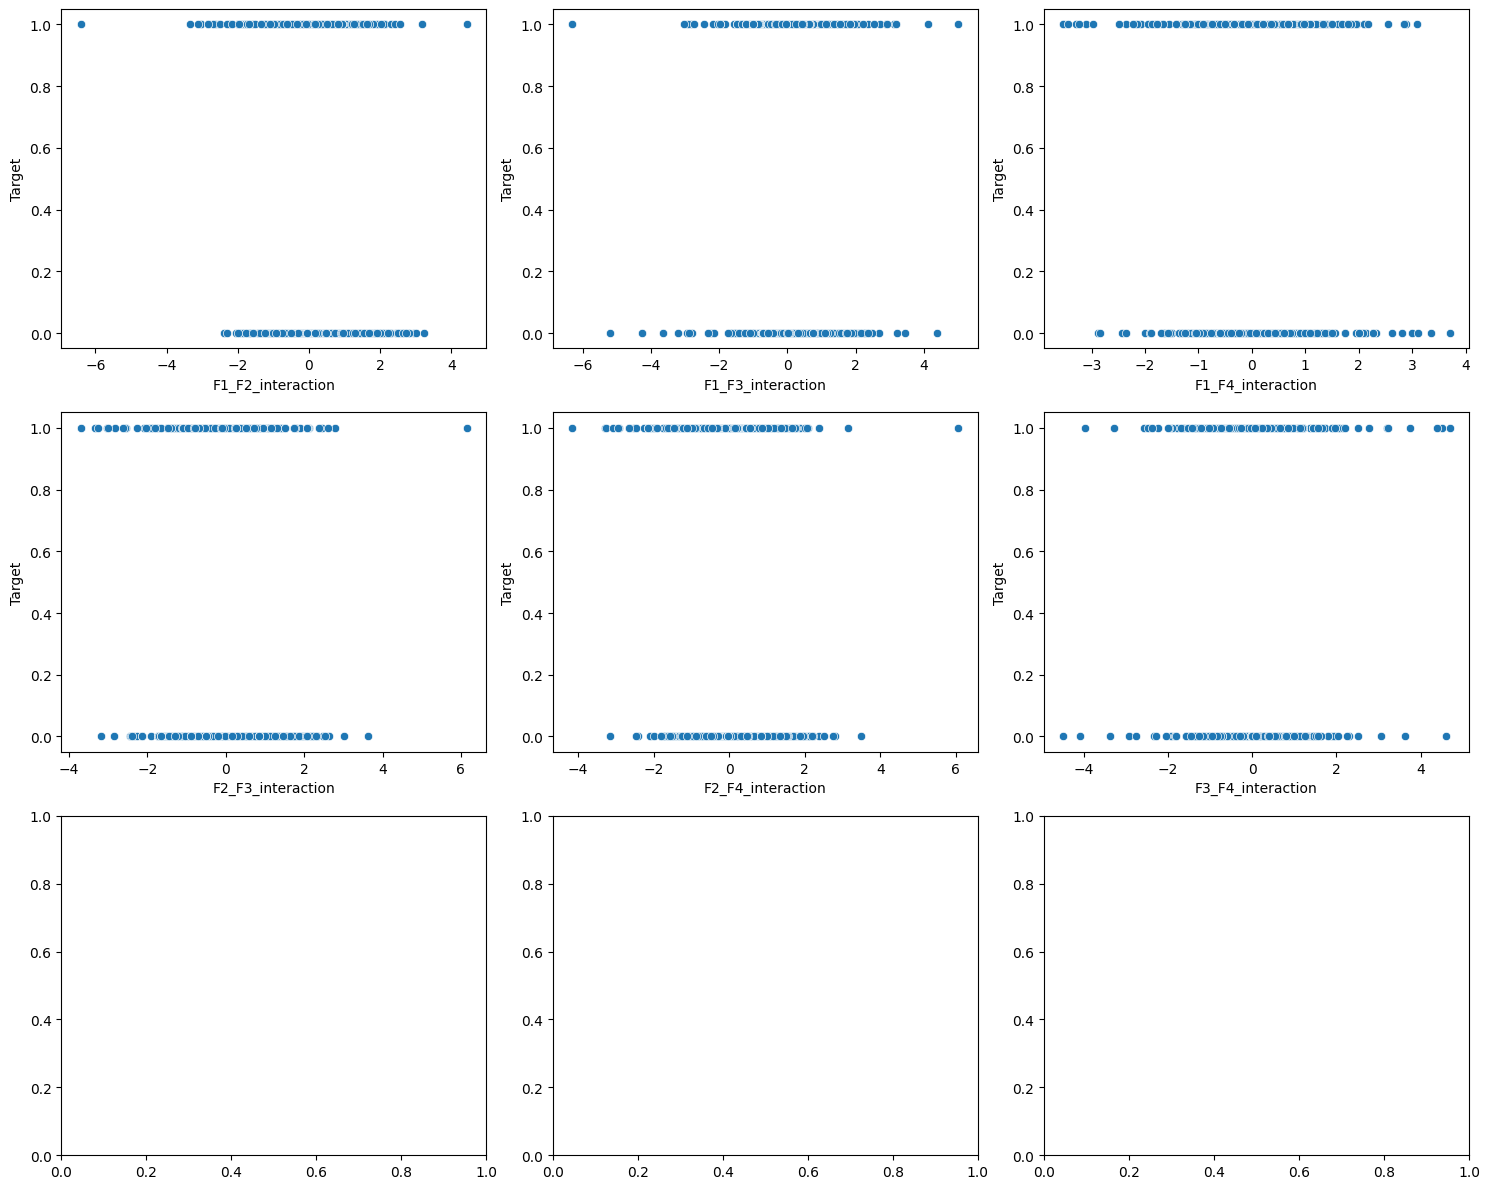

In [174]:

# Assuming 'Target' is the target variable and other columns are features
features = train_data.drop('Target', axis=1)

# Create pairwise interaction terms for all features
interaction_terms = pd.DataFrame()
for i in range(len(features.columns)):
    for j in range(i + 1, len(features.columns)):
        interaction = features.iloc[:, i] * features.iloc[:, j]
        col_name = f"{features.columns[i]}_{features.columns[j]}_interaction"
        interaction_terms[col_name] = interaction

# Concatenate the interaction terms with the original DataFrame
data_interactions = pd.concat([train_data, interaction_terms], axis=1)

# Plot some pairwise interactions against the target
interaction_columns = interaction_terms.columns 

# Plot all the pairwise interactions against the target
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, feature in enumerate(interaction_columns):
    sns.scatterplot(x=feature, y='Target', data=data_interactions, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()


In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score


# Assuming 'Target' is the target variable and other columns are features
X = train_data.drop('Target', axis=1)
y = train_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize a Random Forest Classifier
clf = RandomForestClassifier()

# Iterate through different scalers
for scaler_name, scaler in scalers.items():
    # Fit and transform the scaler on the training data
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform the test data (don't fit again to prevent data leakage)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model on the scaled data
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{scaler_name} Accuracy: {accuracy:.4f}')


StandardScaler Accuracy: 0.9938
MinMaxScaler Accuracy: 0.9938
RobustScaler Accuracy: 0.9938


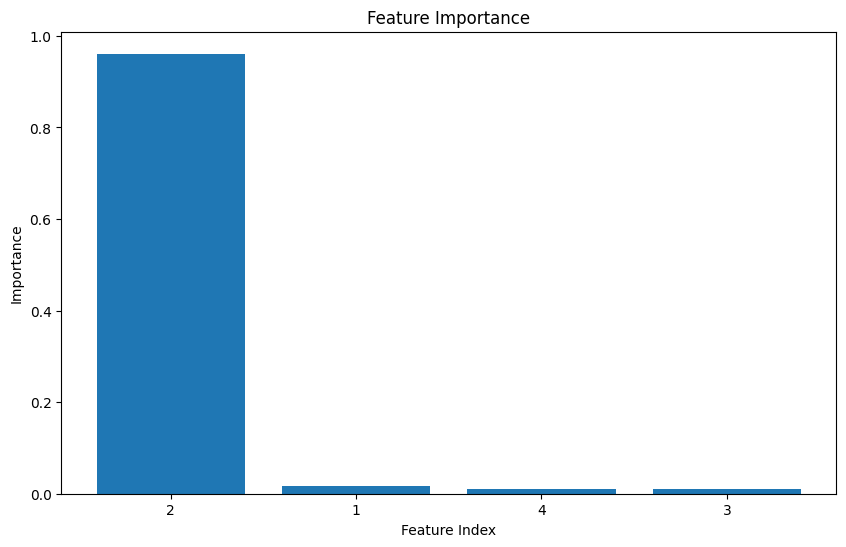

In [175]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' contains your features and 'y' contains the target variable
X = train_data.drop('Target', axis=1)
y = train_data['Target']

# Create a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances from the classifier
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices + 1)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


Accuracy:  0.995
Precision:  1.0
Recall:  0.9893617021276596
ROC AUC:  0.9946808510638299


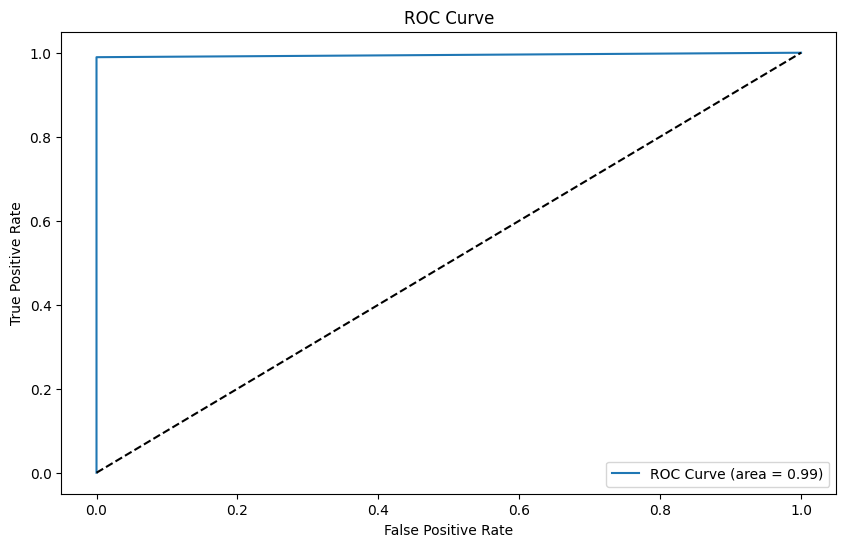

In [169]:
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

# Predicting the target variable for the test data
y_pred = rf.predict(X_test)

# Calculating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# Calculating the precision of the model
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: ', precision)

# Calculating the recall of the model
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: ', recall)

# Calculating the ROC AUC of the model
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: ', roc_auc)

# Plot the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
